
# WeightWatcher - SVDSharpness

### Example with the VGG11 model 

Compare the original (red) vs. smoothed (blue) ESDs



In [1]:
# Suppress the powerlaw package warnings
# "powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide"
# "powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide"
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [2]:
import numpy as np
import pandas as pd

import tensorflow
import torchvision.models as models
from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Import WeightWatcher

set custom Logging at WARN Level

In [3]:
import logging
logging.basicConfig(level=logging.WARNING)
logger = logging.getLogger(__name__)
logger.setLevel(logging.WARNING)


In [4]:
import weightwatcher as ww
logger = logging.getLogger(ww.__name__)
logger.setLevel(logging.WARNING)

ww.__version__

'0.5'

### PyTorch Example

VGG16 has 16 layers

- The last 3 are dense

Assuming nested distributions


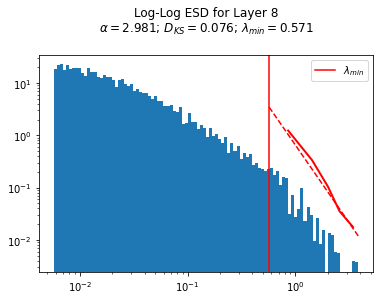

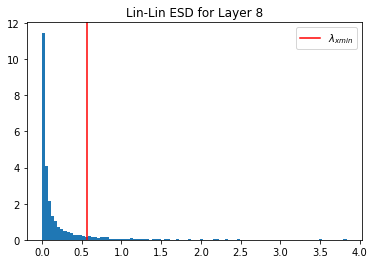

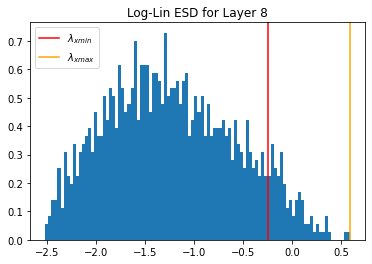

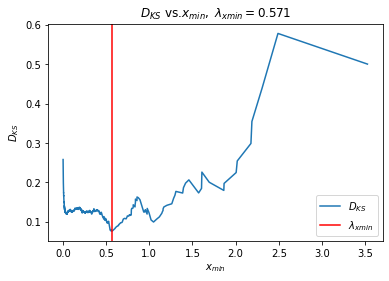

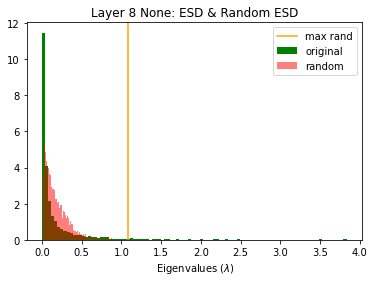

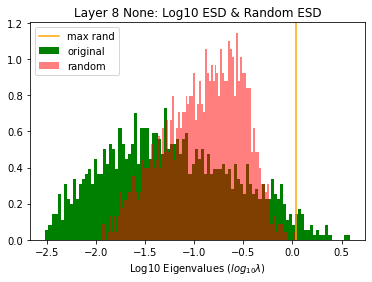

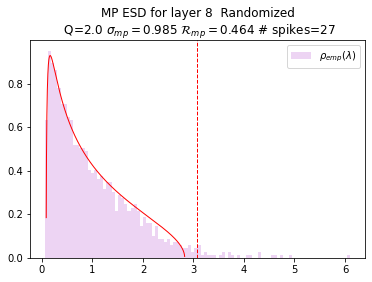

<Figure size 432x288 with 0 Axes>

In [5]:
vgg11 = models.vgg11(pretrained=True)
watcher = ww.WeightWatcher(model=vgg11)
details = watcher.describe()
esd = watcher.get_ESD(model=vgg11, layer=8)
analyzed = watcher.analyze(plot=True, layers=[8], randomize=True)

In [6]:
details

,layer_id,name,M,N,layer_type,num_evals,rf
0,2,None,3.0,64.0,LAYER_TYPE.CONV2D,27.0,9.0
1,5,None,64.0,128.0,LAYER_TYPE.CONV2D,576.0,9.0
2,8,None,128.0,256.0,LAYER_TYPE.CONV2D,1152.0,9.0
3,10,None,256.0,256.0,LAYER_TYPE.CONV2D,2304.0,9.0
4,13,None,256.0,512.0,LAYER_TYPE.CONV2D,2304.0,9.0
5,15,None,512.0,512.0,LAYER_TYPE.CONV2D,4608.0,9.0
6,18,None,512.0,512.0,LAYER_TYPE.CONV2D,4608.0,9.0
7,20,None,512.0,512.0,LAYER_TYPE.CONV2D,4608.0,9.0
8,25,None,4096.0,25088.0,LAYER_TYPE.DENSE,4096.0,1.0
9,28,None,4096.0,4096.0,LAYER_TYPE.DENSE,4096.0,1.0


In [7]:
sharper_vgg11 = watcher.SVDSharpness(model=vgg11, layers=[8])

Assuming nested distributions


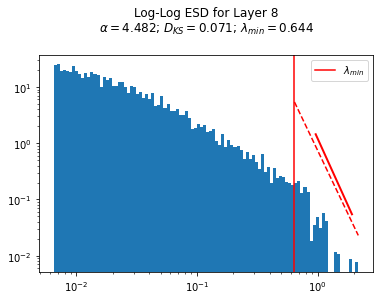

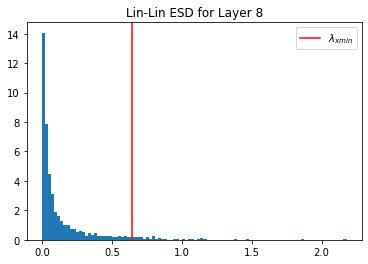

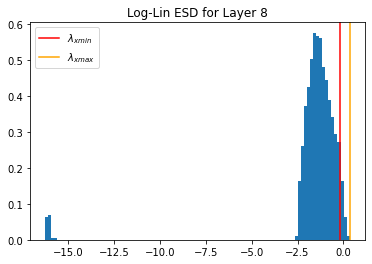

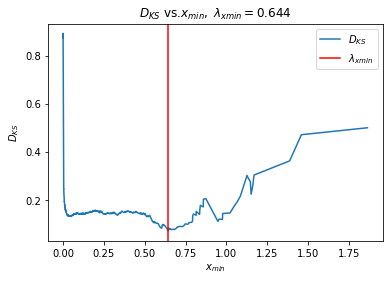

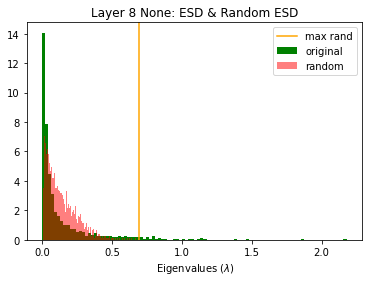

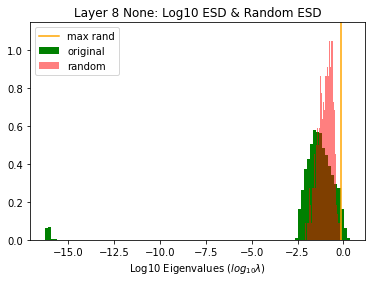

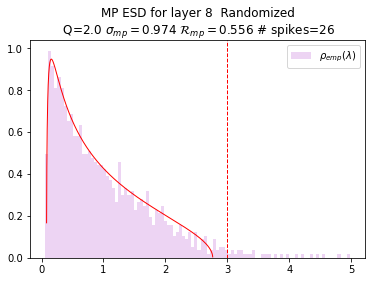

<Figure size 432x288 with 0 Axes>

In [8]:
watcher_sm = ww.WeightWatcher(model=sharper_vgg11)
analyzed_sm = watcher_sm.analyze(plot=True, layers=[8], randomize=True)
esd_sm = watcher_sm.get_ESD(model=sharper_vgg11, layer=8)

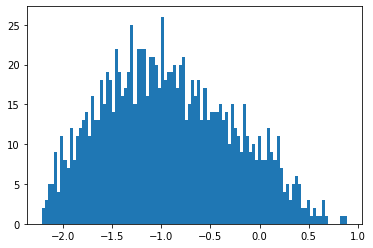

In [9]:
plt.hist(np.log10(esd),bins=100);


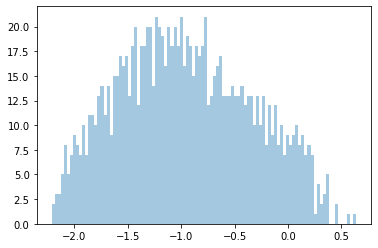

In [10]:
plt.hist(np.log10(esd_sm[esd_sm>0.00001]),bins=100, alpha=0.4);

Text(0.5, 0, 'Layer 8 Eigenvalue,  $\\lambda>0.0$')

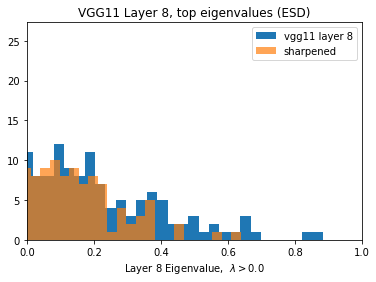

In [11]:
plt.hist(np.log10(esd),bins=100, label='vgg11 layer 8');
plt.hist(np.log10(esd_sm[esd_sm>0.00001]),bins=100, alpha=0.7, label='sharpened');
plt.title("VGG11 Layer 8, top eigenvalues (ESD)")
plt.xlim([0,1])
plt.legend()
plt.xlabel(r"Layer 8 Eigenvalue,  $\lambda>0.0$")

In [12]:
details

,layer_id,name,M,N,layer_type,num_evals,rf
0,2,None,3.0,64.0,LAYER_TYPE.CONV2D,27.0,9.0
1,5,None,64.0,128.0,LAYER_TYPE.CONV2D,576.0,9.0
2,8,None,128.0,256.0,LAYER_TYPE.CONV2D,1152.0,9.0
3,10,None,256.0,256.0,LAYER_TYPE.CONV2D,2304.0,9.0
4,13,None,256.0,512.0,LAYER_TYPE.CONV2D,2304.0,9.0
5,15,None,512.0,512.0,LAYER_TYPE.CONV2D,4608.0,9.0
6,18,None,512.0,512.0,LAYER_TYPE.CONV2D,4608.0,9.0
7,20,None,512.0,512.0,LAYER_TYPE.CONV2D,4608.0,9.0
8,25,None,4096.0,25088.0,LAYER_TYPE.DENSE,4096.0,1.0
9,28,None,4096.0,4096.0,LAYER_TYPE.DENSE,4096.0,1.0
